# News Headlines Sentiment

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from newsapi import NewsApiClient

%matplotlib inline

In [2]:
# Download/Update the VADER Lexicon
nltk.download('vader_lexicon')

# Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/asif/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [3]:
# Read your api key environment variable
api_key = os.getenv("NEWS_API_KEY")

In [4]:
# Create a newsapi client
newsapi = NewsApiClient(api_key= api_key)

In [5]:
# Fetch the Bitcoin news articles
bitcoin_headlines = newsapi.get_everything(
    q= "bitcoin",
    language= "en",
    page_size= 100,
    sort_by= "relevancy"
)
print(f"Total bitcoin headlines: {bitcoin_headlines['totalResults']}")

Total bitcoin headlines: 4569


In [6]:
# Fetch the Ethereum news articles
ethereum_headlines = newsapi.get_everything(
    q= "ethereum",
    language= "en",
    page_size= 100,
    sort_by= "relevancy"
)
print(f"Total ethereum headlines: {ethereum_headlines['totalResults']}")

Total ethereum headlines: 1253


In [7]:
# Create the Bitcoin sentiment scores DataFrame
bitcoin_sentiment = []

for article in bitcoin_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]

        bitcoin_sentiment.append({
            "Date": date,
            "Text": text,
            "Compound": compound,
            "Negative": neg,
            "Neutral": neu,
            "Positive": pos,
        })

    except AttributeError:
        pass

# Dataframe
bitcoin_df = pd.DataFrame(bitcoin_sentiment)
bitcoin_df_columns = ["Date", "Text", "Compound", "Positive", "Neutral", "Negative"]
bitcoin_df = bitcoin_df[bitcoin_df_columns]

bitcoin_df.head()

,Date,Text,Compound,Positive,Neutral,Negative
0,2020-11-12,A former Microsoft software engineer from Ukra...,-0.6705,0.064,0.737,0.199
1,2020-12-03,Visa has partnered with cryptocurrency startup...,0.6369,0.162,0.838,0.000
2,2020-11-12,PayPal is bringing its newly-announced support...,0.2144,0.053,0.947,0.000
3,2020-11-20,"In November 2017, after an absolutely massive,...",0.2023,0.050,0.950,0.000
4,2020-12-06,"Unlike ‘conventional’ cryptocurrencies, a cent...",0.0000,0.000,1.000,0.000


In [8]:
# Create the ethereum sentiment scores DataFrame
ethereum_sentiment = []

for article in ethereum_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]

        ethereum_sentiment.append({
            "Date": date,
            "Text": text,
            "Compound": compound,
            "Negative": neg,
            "Neutral": neu,
            "Positive": pos,
        })

    except AttributeError:
        pass

# Dataframe
ethereum_df = pd.DataFrame(ethereum_sentiment)
ethereum_df_columns = ["Date", "Text", "Compound", "Positive", "Neutral", "Negative"]
ethereum_df = ethereum_df[ethereum_df_columns]

ethereum_df.head()

,Date,Text,Compound,Positive,Neutral,Negative
0,2020-11-12,PayPal is bringing its newly-announced support...,0.2144,0.053,0.947,0.0
1,2020-11-23,FILE PHOTO: Representation of the Ethereum vir...,0.0000,0.000,1.000,0.0
2,2020-11-23,FILE PHOTO: Representation of the Ethereum vir...,0.0000,0.000,1.000,0.0
3,2020-11-23,LONDON (Reuters) - Digital currencies Ethereum...,0.4215,0.088,0.912,0.0
4,2020-12-07,NEW YORK (Reuters) - Institutional investors p...,0.1779,0.052,0.948,0.0


In [9]:
# Describe the Bitcoin Sentiment
bitcoin_df.describe()

,Compound,Positive,Neutral,Negative
count,98.000000,98.000000,98.000000,98.000000
mean,0.157352,0.057449,0.922122,0.020429
std,0.340462,0.066147,0.082311,0.052755
min,-0.946800,0.000000,0.637000,0.000000
25%,0.000000,0.000000,0.858500,0.000000
50%,0.000000,0.050000,0.947500,0.000000
75%,0.435675,0.120000,1.000000,0.000000
max,0.877900,0.318000,1.000000,0.363000


In [10]:
# Describe the Ethereum Sentiment
ethereum_df.describe()

,Compound,Positive,Neutral,Negative
count,96.000000,96.000000,96.000000,96.000000
mean,0.229907,0.077344,0.901458,0.021208
std,0.366600,0.079543,0.088671,0.045445
min,-0.670500,0.000000,0.653000,0.000000
25%,0.000000,0.000000,0.848500,0.000000
50%,0.220350,0.074000,0.912000,0.000000
75%,0.510600,0.128250,1.000000,0.000000
max,0.883400,0.347000,1.000000,0.196000


### Questions:

Q: Which coin had the highest mean positive score?

A: Ethereum with 0.076

Q: Which coin had the highest compound score?

A: Bitcoin with 98.0

Q. Which coin had the highest positive score?

A: Ethereum with 0.32

---

# Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [11]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [12]:
# Expand the default stopwords list if necessary
nltk.download('stopwords')
nltk.download('wordnet')
add_stopwords = {"file", "photo", "reuters", " ", "staff", "char ", "virtual", "currency", "ruvicillustration", "reutersdado"}

[nltk_data] Downloading package stopwords to /Users/asif/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/asif/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [13]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Create a list of the words
    tokenized_words = word_tokenize(text)

    # Convert the words to lowercase
    lowercase_words = [word.lower() for word in tokenized_words]

    # Remove the punctuation
    regex = re.compile("[^a-zA-Z]")
    regex_words = [regex.sub("", word) for word in lowercase_words]

    # Remove the stop words
    sw = set(stopwords.words("english"))
    removed_stopwords = [word.lower() for word in regex_words if word not in sw.union(add_stopwords)]

    # Lemmatize Words into root words
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in removed_stopwords]

    return tokens

In [14]:
# Create a new tokens column for bitcoin
bitcoin_tokens = [tokenizer(headline) for headline in bitcoin_df["Text"]]
bitcoin_df["Tokens"] = bitcoin_tokens

bitcoin_df.head(10)

,Date,Text,Compound,Positive,Neutral,Negative,Tokens
0,2020-11-12,A former Microsoft software engineer from Ukra...,-0.6705,0.064,0.737,0.199,"[former, microsoft, software, engineer, ukrain..."
1,2020-12-03,Visa has partnered with cryptocurrency startup...,0.6369,0.162,0.838,0.000,"[visa, partnered, cryptocurrency, startup, blo..."
2,2020-11-12,PayPal is bringing its newly-announced support...,0.2144,0.053,0.947,0.000,"[paypal, bringing, newlyannounced, support, cr..."
3,2020-11-20,"In November 2017, after an absolutely massive,...",0.2023,0.050,0.950,0.000,"[november, , , absolutely, massive, , twomonth..."
4,2020-12-06,"Unlike ‘conventional’ cryptocurrencies, a cent...",0.0000,0.000,1.000,0.000,"[unlike, , conventional, , cryptocurrencies, ,..."
5,2020-11-25,If youve been watching the crypto markets over...,0.4404,0.152,0.773,0.075,"[youve, watching, crypto, market, past, week, ..."
6,2020-12-03,Decentralized exchange protocols that allow cr...,0.4019,0.117,0.883,0.000,"[decentralized, exchange, protocol, allow, cry..."
7,2020-11-30,4. U.S. markets ended November with large gain...,0.7650,0.171,0.829,0.000,"[, , u, market, ended, november, large, gain, ..."
8,2020-11-17,"Maisie Williams also known as Arya Stark, daug...",0.0000,0.000,1.000,0.000,"[maisie, williams, also, known, arya, stark, ,..."
9,2020-11-10,1 with 1 posters participating\r\nA former Mic...,-0.6705,0.069,0.716,0.215,"[, , poster, participating, former, microsoft,..."


In [15]:
# Create a new tokens column for ethereum
ethereum_tokens = [tokenizer(headline) for headline in ethereum_df["Text"]]
ethereum_df["Tokens"] = ethereum_tokens

ethereum_df.head(10)

,Date,Text,Compound,Positive,Neutral,Negative,Tokens
0,2020-11-12,PayPal is bringing its newly-announced support...,0.2144,0.053,0.947,0.0,"[paypal, bringing, newlyannounced, support, cr..."
1,2020-11-23,FILE PHOTO: Representation of the Ethereum vir...,0.0000,0.000,1.000,0.0,"[, representation, ethereum, standing, pc, mot..."
2,2020-11-23,FILE PHOTO: Representation of the Ethereum vir...,0.0000,0.000,1.000,0.0,"[, representation, ethereum, standing, pc, mot..."
3,2020-11-23,LONDON (Reuters) - Digital currencies Ethereum...,0.4215,0.088,0.912,0.0,"[london, , , , digital, currency, ethereum, xr..."
4,2020-12-07,NEW YORK (Reuters) - Institutional investors p...,0.1779,0.052,0.948,0.0,"[new, york, , , , institutional, investor, pum..."
5,2020-12-07,NEW YORK (Reuters) - Institutional investors p...,0.1779,0.052,0.948,0.0,"[new, york, , , , institutional, investor, pum..."
6,2020-11-19,"PayPal has launched the Generosity Network, a ...",0.8779,0.318,0.682,0.0,"[paypal, launched, generosity, network, , plat..."
7,2020-11-26,By Reuters Staff\r\nFILE PHOTO: A representati...,0.0000,0.000,1.000,0.0,"[, representation, bitcoin, seen, front, stock..."
8,2020-11-26,By Reuters Staff\r\nFILE PHOTO: A representati...,0.0000,0.000,1.000,0.0,"[, representation, bitcoin, seen, front, stock..."
9,2020-11-26,The New York Times is (probably) about to publ...,0.0000,0.000,1.000,0.0,"[new, york, time, , probably, , publish, story..."


---

# NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [16]:
from collections import Counter
from nltk import ngrams

In [17]:
# Generate the Bitcoin N-grams where N=2

# Create a function to list all words in the tokens column in a long list
def bigrams(df_column):
    """
    Joins all the words in the column into a single list and returns bigrams
    """
    all_words = [" ".join(word) for word in df_column]

    # Get bigrams
    processed = tokenizer(str(all_words))
    bigram = ngrams(processed, n= 2)

    return bigram

# Bitcoin bigrams
bitcoin_bigram = bigrams(bitcoin_df["Tokens"])
bitcoin_frequency = Counter(bitcoin_bigram).most_common(20)
bitcoin_frequency

[(('', ''), 131),
 (('char', ''), 97),
 (('', 'representation'), 23),
 (('representation', 'bitcoin'), 23),
 (('illustration', 'taken'), 23),
 (('bitcoin', 'seen'), 19),
 (('new', 'york'), 14),
 (('', 'london'), 13),
 (('taken', 'november'), 12),
 (('london', 'bitcoin'), 11),
 (('seen', 'illustration'), 9),
 (('york', 'bitcoin'), 9),
 (('picture', 'illustration'), 8),
 (('taken', 'taken'), 8),
 (('taken', 'march'), 8),
 (('seen', 'picture'), 7),
 (('seen', 'front'), 7),
 (('', 'new'), 7),
 (('march', 'ruvic'), 6),
 (('stock', 'graph'), 6)]

In [18]:
# Generate the Ethereum N-grams where N=2
ethereum_bigram = bigrams(ethereum_df["Tokens"])
ethereum_frequency = Counter(ethereum_bigram).most_common(20)
ethereum_frequency

[(('', ''), 107),
 (('char', ''), 96),
 (('', 'representation'), 9),
 (('ul', 'li'), 9),
 (('', 'ethereum'), 9),
 (('', 'bitcoin'), 8),
 (('new', 'york'), 7),
 (('representation', 'bitcoin'), 7),
 (('illustration', 'taken'), 7),
 (('', 'new'), 6),
 (('bitcoin', 'seen'), 6),
 (('bitcoin', 'ethereum'), 6),
 (('ethereum', 'blockchain'), 6),
 (('seen', 'illustration'), 5),
 (('taken', 'november'), 5),
 (('ripple', 'xrp'), 5),
 (('institutional', 'investor'), 4),
 (('cryptocurrency', 'exchange'), 4),
 (('last', 'month'), 4),
 (('bitcoin', 'price'), 4)]

In [19]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [20]:
# Get the top 10 words for Bitcoin
bitcoin_all_words = " ".join(bitcoin_df["Text"])
bitcoin_all_words_tokenized = tokenizer(bitcoin_all_words)
bitcoin_top_10 = token_count(bitcoin_all_words_tokenized)

bitcoin_top_10

[('', 960),
 ('char', 97),
 ('bitcoin', 87),
 ('taken', 31),
 ('illustration', 27),
 ('representation', 26),
 ('london', 26),
 ('seen', 25),
 ('cryptocurrency', 22),
 ('new', 19)]

In [21]:
# Get the top 10 words for Ethereum
ethereum_all_words = " ".join(ethereum_df["Text"])
ethereum_all_words_tokenized = tokenizer(ethereum_all_words)
ethereum_top_10 = token_count(ethereum_all_words_tokenized)

ethereum_top_10

[('', 839),
 ('char', 96),
 ('ethereum', 55),
 ('bitcoin', 47),
 ('cryptocurrency', 18),
 ('blockchain', 18),
 ('new', 15),
 ('li', 15),
 ('asset', 13),
 ('price', 13)]

# Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [22]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

(-0.5, 399.5, 199.5, -0.5)

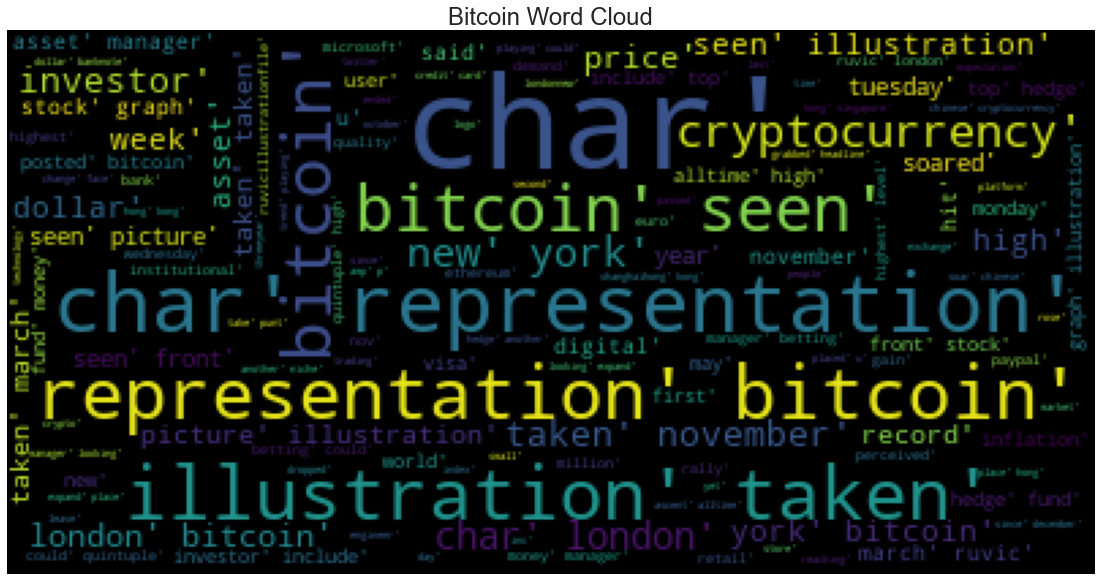

In [37]:
# Generate the Bitcoin word cloud
bitcoin_wc = WordCloud().generate(str(bitcoin_all_words_tokenized))

plt.imshow(bitcoin_wc)
plt.title("Bitcoin Word Cloud",
    fontdict={"size":24}
)
plt.axis("off")

(-0.5, 399.5, 199.5, -0.5)

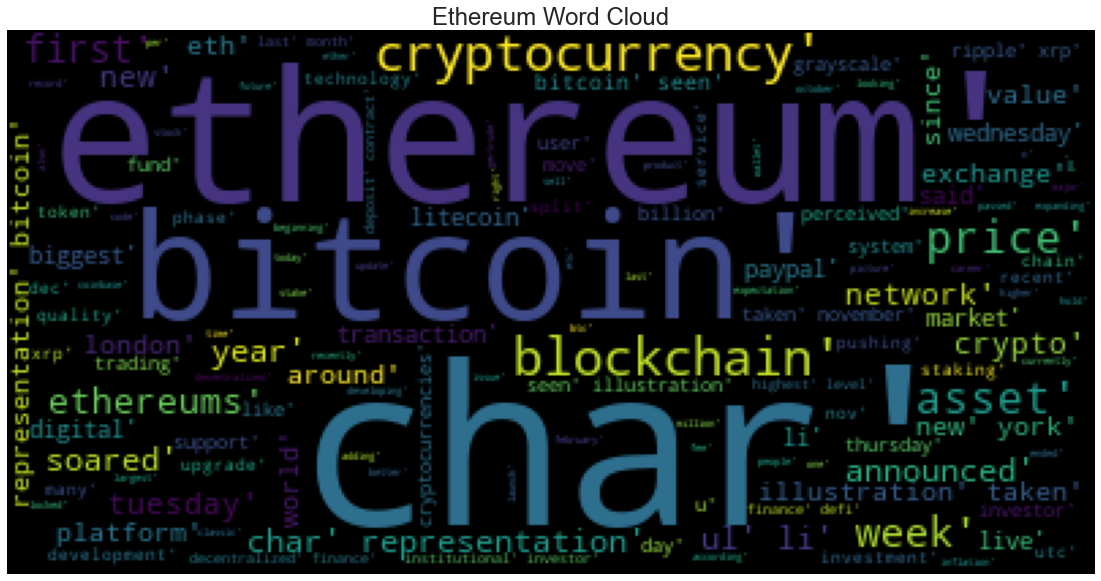

In [38]:
# Generate the Ethereum word cloud
ethereum_wc = WordCloud().generate(str(ethereum_all_words_tokenized))

plt.imshow(ethereum_wc)
plt.title("Ethereum Word Cloud",
    fontdict={"size":24}
)
plt.axis("off")

# Named Entity Recognition

In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [39]:
import spacy
from spacy import displacy

In [40]:
# Optional - download a language model for SpaCy
# !python -m spacy download en_core_web_sm

In [41]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

## Bitcoin NER

In [42]:
# Concatenate all of the bitcoin text together
bitcoin_all_words

nes favorite decentralized digital currency based on hype, lies, and general mal… [+2490 chars] Decentralized exchange protocols that allow crypto traders and investors to trade across different blockhains have been in development for a while. A significant new development now comes with the la… [+3079 chars] 4. U.S. markets ended November with large gains. \r\nEven with a small decline today, the S&amp;P 500 jumped by 10.8 percent in November, its best monthly showing since April and the fourth-best month … [+535 chars] Maisie Williams also known as Arya Stark, daughter of Lady Catelyn and Lord Eddard, acolyte of the Faceless Men, you know the one is considering buying some bitcoins.\xa0\r\nOn Monday, she asked her Twitt… [+1512 chars] 1 with 1 posters participating\r\nA former Microsoft software engineer from Ukraine has been sentenced to nine years in prison for stealing more than $10 million in store credit from Microsoft's online… [+3119 chars] 8 with 7 posters participating\r\nBi

In [43]:
# Run the NER processor on all of the text
bitcoin_ner = nlp(bitcoin_all_words)

# Add a title to the document
bitcoin_ner.user_data["title"] = "Bitcoin NER"

In [44]:
# Render the visualization
displacy.render(bitcoin_ner, style='ent')

In [54]:
# List all Entities
#print([ent.text + ent.label_ for ent in bitcoin_ner.ents])
for ent in bitcoin_ner.ents:
    print(ent.text, ent.label_)

Microsoft ORG
Ukraine GPE
nine years DATE
more than $10 million MONEY
Microsoft ORG
2016 to 2018 DATE
Visa ORG
first ORDINAL
Bitcoin GPE
PayPal PRODUCT
US GPE
first ORDINAL
US GPE
October DATE
November 2017 DATE
two-month DATE
Bitcoin GPE
10,000 MONEY
first ORDINAL
the next 20 days DATE
19,665 MONEY
digital yuan ORG
the People’s Bank of China ORG
the past few weeks DATE
bitcoin GPE
digital ORG
hype GPE
Decentralized GPE
4 CARDINAL
U.S. GPE
November DATE
today DATE
500 CARDINAL
10.8 percent PERCENT
November DATE
monthly DATE
April DATE
fourth ORDINAL
Maisie Williams PERSON
Arya Stark PERSON
Lady Catelyn PERSON
Eddard PERSON
acolyte PERSON
the Faceless Men WORK_OF_ART
Monday DATE
1 CARDINAL
1 CARDINAL
Microsoft ORG
Ukraine GPE
nine years DATE
more than $10 million MONEY
Microsoft ORG
8 CARDINAL
7 CARDINAL
Bitcoin GPE
above $18,000 MONEY
Tuesday DATE
evening TIME
December 2017 DATE
this week DATE
more than $18,000 MONEY
Bitcoin GPE
March 13, 2020 DATE
REUTERS/ ORG
Tom Wilson PERSON
Justin

## Ethereum NER

In [55]:
# Concatenate all of the ethereum text together
ethereum_all_words

ereum virtual currency… [+1950 chars] NEW YORK (Reuters) - Institutional investors pumped $429 million into cryptocurrency funds and products for the week ended Dec. 7, the second highest on record, pushing the sectors assets under manag… [+1888 chars] NEW YORK (Reuters) - Institutional investors pumped $429 million into cryptocurrency funds and products for the week ended Dec. 7, the second highest on record, pushing the sectors assets under manag… [+1888 chars] PayPal has launched the Generosity Network, a platform that allows users to create customized, personal fundraising campaigns. Yes, just like you can on GoFundMe.\xa0\r\nYou can raise a maximum of $20,000… [+1601 chars] By Reuters Staff\r\nFILE PHOTO: A representation of virtual currency Bitcoin is seen in front of a stock graph in this illustration taken November 19, 2020. REUTERS/Dado Ruvic/Illustration/File photo\r\n… [+336 chars] By Reuters Staff\r\nFILE PHOTO: A representation of virtual currency Bitcoin is seen in front 

In [56]:
# Run the NER processor on all of the text
ethereum_ner = nlp(ethereum_all_words)

# Add a title to the document
ethereum_ner.user_data["title"] = "Ethereum NER"

In [57]:
# Render the visualization
displacy.render(ethereum_ner, style='ent')

In [58]:
# List all Entities
for ent in ethereum_ner.ents:
    print(ent.text, ent.label_)

PayPal PRODUCT
US GPE
first ORDINAL
US GPE
October DATE
February 3, 2018 DATE
REUTERS/ ORG
Reuters ORG
February 3, 2018 DATE
REUTERS/ ORG
Reuters ORG
LONDON GPE
Reuters ORG
XRP ORG
Monday DATE
NEW YORK PERSON
Reuters ORG
$429 million MONEY
the week ended Dec. 7 DATE
second ORDINAL
NEW YORK PERSON
Reuters ORG
$429 million MONEY
the week ended Dec. 7 DATE
second ORDINAL
PayPal PERSON
the Generosity Network ORG
20,000 MONEY
Reuters ORG
Bitcoin GPE
November 19, 2020 DATE
REUTERS/ ORG
Reuters ORG
Bitcoin GPE
November 19, 2020 DATE
REUTERS/ ORG
The New York Times ORG
Coinbase ORG
early February this year DATE
last month DATE
October DATE
$24 million MONEY
November DATE
8 DATE
2020 DATE
5 CARDINAL
ICO ORG
Bitcoin GPE
Reuters ORG
Bitcoin GPE
November 19, 2020 DATE
REUTERS/ ORG
Reuters ORG
Reuters ORG
Bitcoin GPE
November 19, 2020 DATE
REUTERS/ ORG
Reuters ORG
Reuters ORG
Bitcoin GPE
U.S. GPE
May 26, 2020 DATE
REUTERS/ ORG
Reuters ORG
Reuters ORG
Bitcoin GPE
November 19, 2020 DATE
REUTERS/ ORG
